In [1]:
'''
This is an example notebook to produce SWAT+ weather files from csv files
Please follow the same file structure as specified on the tutorial

'''

# Imports
import pandas as pd
import numpy as np
from ExportWeatherSwatPlus import *
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
os.chdir('..') # Changing to main SWATPlusForCRIDA

# Functions
def create_cli(stat_list,var,cli_path):
    with open(cli_path, 'w') as f:
        f.write(f"{var}.cli : written by Jose Teran \n")
        f.write(f"filename \n")

        df_cli = stat_list[["NAME"]]
        df_cli = df_cli["NAME"]+"."+var
        
        df_cli.to_csv(f, index=False, header=None, sep="\t",lineterminator='\n')
         
        print(f"File {cli_path} succesfully saved")

In [2]:

data_folder = "data"
# Paths
pcp_list_path     = f"{data_folder}/weather_example/precipitation_stations.xlsx"  	# Precipitation station list (Excel File)
tmp_list_path     = f"{data_folder}/weather_example/temperature_stations.xlsx"  	# Temperature station list (Excel File)
pcp_csv_path      = f"{data_folder}/weather_example/data_precip"  	                # Paths to csv with data for P (Folder)
tmp_csv_path      = f"{data_folder}/weather_example/data_temp"  	                # Paths to csv with data for T (Folder)
swat_weather_path = f"{data_folder}/weather_example/swat_weather"                   # SWAT+ weather files folder

### Observing one station

Text(0, 0.5, 'Daily Mean Temperature (°)')

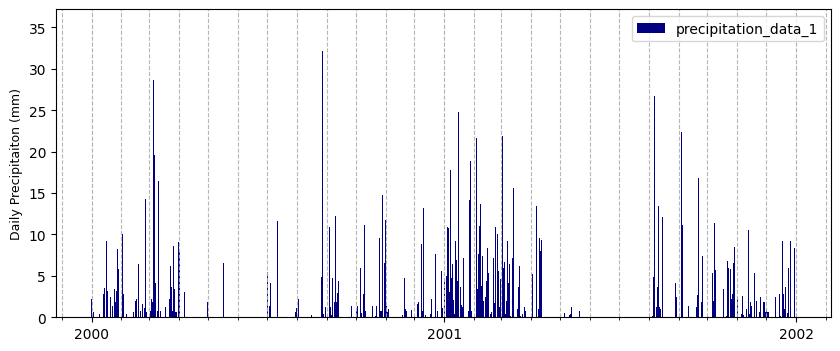

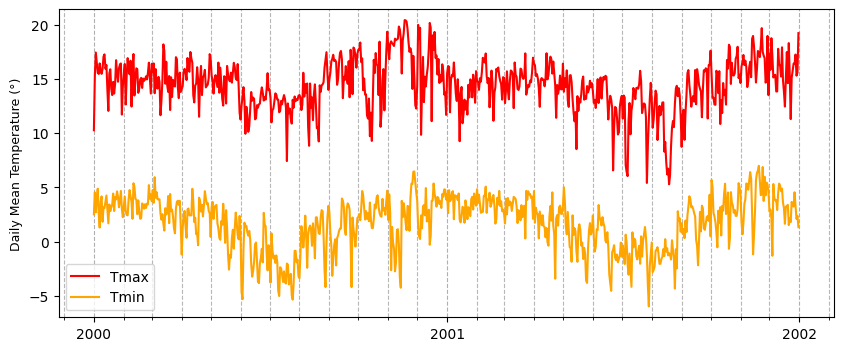

In [3]:
# Plotting one of the csv files to see the time series
pcp_file_1 = os.listdir(pcp_csv_path)[0]                    # Reading the first station's data for p
df_pcp_1 = pd.read_csv(f"{pcp_csv_path}/{pcp_file_1}")
df_pcp_1["time"] = pd.to_datetime(df_pcp_1["time"],dayfirst=True)

tmp_file_1 = os.listdir(tmp_csv_path)[0]                    # Reading the first station's data for T
df_tmp_1 = pd.read_csv(f"{tmp_csv_path}/{tmp_file_1}")
df_tmp_1["time"] = pd.to_datetime(df_tmp_1["time"],dayfirst=True)

#=========================================================================================================
# Set plotting options
plot_style = "default" # https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
xlabel   = "Date"                       # Xlabel

ylabel_fontsize = 9
# For precip
ylabel_p = "Daily Precipitaiton (mm)"   # Ylabel
ylims_p  = [0,df_pcp_1["value"].max()+5]  # Y axis limits
color_p = "navy"

# For Temp
ylabel_t = "Daily Mean Temperature (°)"   # Ylabel
ylims_t  = [df_tmp_1["tmin"].min()-1,df_tmp_1["tmax"].max()+1]    # Y axis limits


plt.style.use(plot_style)
#=========================================================================================================

fig , ax = plt.subplots(figsize = (10,4))                    
ax.bar(df_pcp_1['time'], df_pcp_1['value'], width=1,color = color_p,label=f"{pcp_file_1[:-4]}")  # You can adjust `width`
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(plt.NullFormatter())
ax.legend()
ax.grid(True, which='minor', axis='x', linestyle='--', alpha=0.9)
ax.grid(True, which='major', axis='x', linestyle='--', alpha=1)

ax.set_ylim(ylims_p)
ax.set_ylabel(ylabel_p,fontsize = ylabel_fontsize)

fig , ax = plt.subplots(figsize = (10,4))
ax.plot(df_tmp_1["time"], df_tmp_1["tmax"], color="red", label="Tmax")
ax.plot(df_tmp_1["time"], df_tmp_1["tmin"], color="orange", label="Tmin")
ax.legend()

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(plt.NullFormatter())
ax.grid(True, which='minor', axis='x', linestyle='--', alpha=0.9)
ax.grid(True, which='major', axis='x', linestyle='--', alpha=1)

ax.set_ylim(ylims_t)
ax.set_ylabel(ylabel_t,fontsize = ylabel_fontsize)

### Export Precipitation

In [4]:
# Read station list
stat_list = pd.read_excel(pcp_list_path)        # Reading list ofstationsas Dataframe
stat_list                                       # Observe it

,NAME,LAT,LONG,ELEVATION
0,stat-pcp1,-16.58,-68.16,3764
1,stat-pcp2,-16.35,-68.08,4383
2,stat-pcp3,-16.42,-68.48,3825
3,stat-pcp4,-16.02,-67.70,3833


In [5]:
# Create .cli and .pcp files
cli_file = "pcp.cli"
cli_path = f"{swat_weather_path}/{cli_file}"

        
create_cli(stat_list,"pcp",cli_path)
CsvToSwatPlus(stat_list,pcp_csv_path,"pcp",swat_weather_path)


File data/weather_example/swat_weather/pcp.cli succesfully saved
File data/weather_example/swat_weather/stat-pcp1.pcp successfully saved
File data/weather_example/swat_weather/stat-pcp2.pcp successfully saved
File data/weather_example/swat_weather/stat-pcp3.pcp successfully saved
File data/weather_example/swat_weather/stat-pcp4.pcp successfully saved


### Export Temperature

In [6]:
# Read station list
stat_list = pd.read_excel(tmp_list_path)        # Reading list ofstationsas Dataframe
stat_list                                       # Observe it

,NAME,LAT,LONG,ELEVATION
0,stat-tmp1,-16.58,-68.16,3764
1,stat-tmp2,-16.35,-68.08,4383
2,stat-tmp3,-16.42,-68.48,3825
3,stat-tmp4,-16.02,-67.70,3833


In [7]:
# Create .cli and .pcp files
cli_file = "tmp.cli"
cli_path = f"{swat_weather_path}/{cli_file}"

        
create_cli(stat_list,"tmp",cli_path)
CsvToSwatPlusTemp(stat_list,tmp_csv_path,"tmp",swat_weather_path)

File data/weather_example/swat_weather/tmp.cli succesfully saved
File data/weather_example/swat_weather/stat-tmp1.tmp successfully saved
File data/weather_example/swat_weather/stat-tmp2.tmp successfully saved
File data/weather_example/swat_weather/stat-tmp3.tmp successfully saved
File data/weather_example/swat_weather/stat-tmp4.tmp successfully saved
